<a href="https://colab.research.google.com/github/pari1jay/6_Customer-sentiment-Analysis/blob/main/Customer_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connect Colab with Google Drive

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd # data manipulation
import matplotlib.pyplot as plt #plotting
from wordcloud import WordCloud, STOPWORDS #filter stopwords

     
Reading consumer complaints dataset

In [ ]:
df= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/consumer_complaints.csv')
df.head()

/tmp/ipython-input-3-483941321.py:1: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/consumer_complaints.csv')


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [ ]:
cp= df["product"].value_counts()
cp

,count
product,
Mortgage,186475
Debt collection,101052
Credit reporting,91854
Credit card,66468
Bank account or service,62563
Consumer Loan,20990
Student loan,15839
Payday loan,3877
Money transfers,3812


In [ ]:
cr= df['company_response_to_consumer'].value_counts()
cr

,count
company_response_to_consumer,
Closed with explanation,404293
Closed with non-monetary relief,70237
Closed with monetary relief,38262
Closed without relief,17909
Closed,13399
Closed with relief,5305
In progress,3763
Untimely response,2789


In [ ]:
disputed = df['consumer_disputed?'].value_counts()
tdispute = df['company'].loc[df['consumer_disputed?'] == 'Yes'].value_counts()[:10]
tnodispute = df['company'].loc[df['consumer_disputed?'] == 'No'].value_counts()[:10]

In [ ]:
disputed

,count
consumer_disputed?,
No,443823
Yes,112134


In [ ]:
tdispute

,count
company,
Bank of America,12480
Wells Fargo & Company,9644
JPMorgan Chase & Co.,7716
Equifax,6647
Citibank,5245
Ocwen,5067
Experian,3891
"TransUnion Intermediate Holdings, Inc.",3824
Nationstar Mortgage,3157


In [ ]:
tnodispute

,count
company,
Bank of America,43518
Wells Fargo & Company,32380
Experian,27014
JPMorgan Chase & Co.,26165
Equifax,25181
"TransUnion Intermediate Holdings, Inc.",21710
Citibank,20295
Ocwen,15911
Capital One,12693


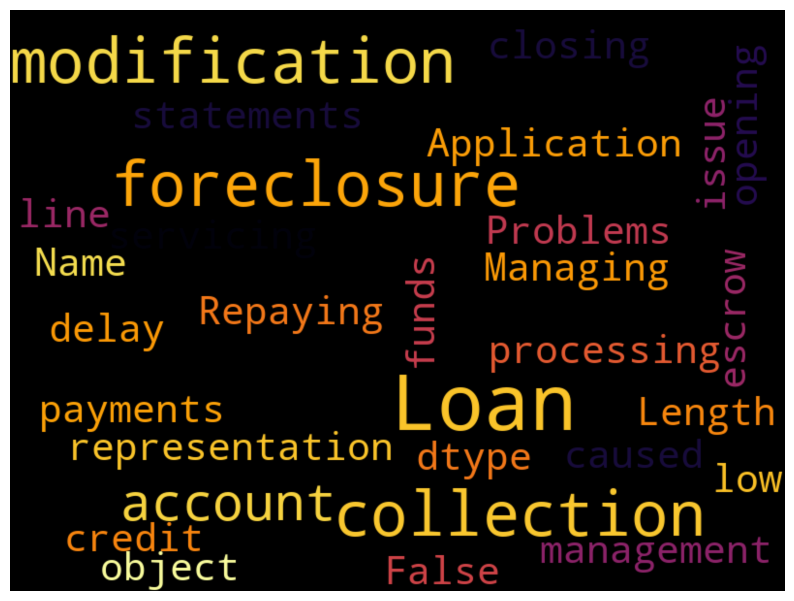

In [ ]:
disputes_issue = df['issue'].loc[df['consumer_disputed?'] == 'Yes']
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'inferno',
                       margin = 0,
                       max_words = 2000,
                       max_font_size = 80,
                       background_color = "black").generate(str(disputes_issue))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


df['issue'] = df['issue'].str.strip().str.lower()

#Encode labels

In [ ]:

from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column.
df['consumer_disputed']= label_encoder.fit_transform(df['consumer_disputed?'])

df['consumer_disputed'].unique()
# YES = 1
# No = 0


array([1, 0])

In [ ]:
df


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,consumer_disputed
0,08/30/2013,Mortgage,Other mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,1
1,08/30/2013,Mortgage,Other mortgage,"loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,1
2,08/30/2013,Credit reporting,NaN,incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,0
3,08/30/2013,Student loan,Non-federal student loan,repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,1
4,08/30/2013,Debt collection,Credit card,false statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,07/01/2014,Mortgage,Other mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529,0
555953,07/01/2014,Mortgage,Other mortgage,"loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447,0
555954,07/10/2012,Mortgage,Conventional fixed mortgage,"loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550,0
555955,04/14/2015,Debt collection,I do not know,communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963,0


Dividing dataset into test and train set

In [ ]:
x = df['issue']
y = df['consumer_disputed']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

Vectorize text reviews to numbers

In [ ]:
vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

Navie Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x, y)



MultinomialNB()

In [ ]:
model.score(x_test, y_test)

0.7866393265702568

In [ ]:
model.predict(vec.transform(['Communication tactics']))

array([0])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)


In [ ]:
dct.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
dct.score(x_test,y_test)

0.7983020361177063

In [ ]:
dct.predict(vec.transform(['Managing the loan or lease']))



array([0])

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(x,y)

y_pred = model1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy',accuracy)

Accuracy 0.789358946686812


#Accuracy of ML Algorithms

In [ ]:
a = model.score(x_test, y_test)
b = dct.score(x_test,y_test)
c = accuracy
print("Navie Bayes Accuracy = ",a)
print("Decision Tree Accuracy = ",b)
print("KNN Accuracy = ",c)

Navie Bayes Accuracy =  0.7866393265702568
Decision Tree Accuracy =  0.7983020361177063
KNN Accuracy =  0.789358946686812


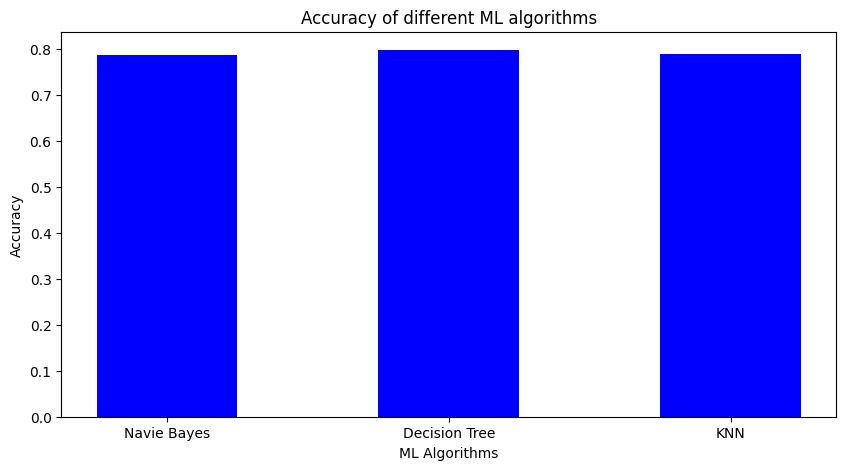

In [ ]:
data = {"Navie Bayes":a, "Decision Tree":b,"KNN":c}
ML = list(data.keys())
Accuracy = list(data.values())

fig = plt.figure(figsize = (10,5))

plt.bar(ML, Accuracy, color = "blue", width = 0.5)

plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of different ML algorithms")
plt.show()

A pie chart depicting the percentage of positive, negative, and neutral sentiments.

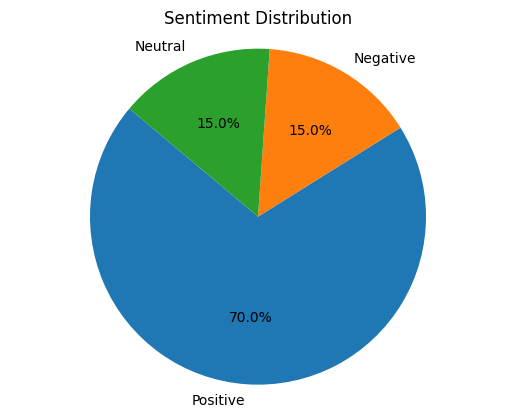

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = ['Positive', 'Negative', 'Neutral']
sentiment_values = [70, 15, 15]  # Example data

plt.pie(sentiment_values, labels=sentiment_counts, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie chart is circular.
plt.show()


line graph of sentiment score (positive/negative) over a specific time range

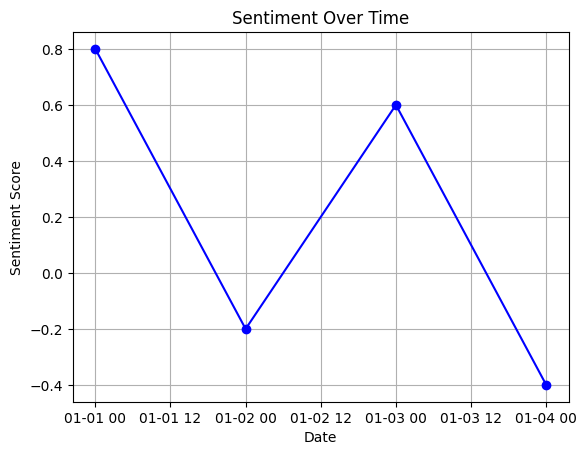

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (date and sentiment score)
data = {'Date': ['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04'],
        'Sentiment': [0.8, -0.2, 0.6, -0.4]}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'], df['Sentiment'], marker='o', color='b')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.show()


most common words used in positive, negative, and neutral reviews with a word cloud.

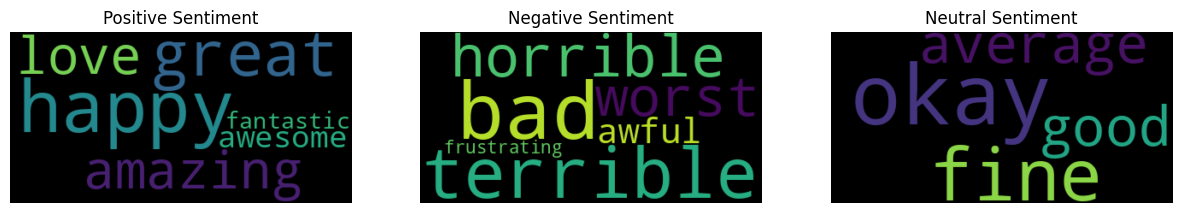

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample data: Positive, Negative, and Neutral reviews (text data)
positive_reviews = 'happy great amazing love awesome fantastic'
negative_reviews = 'bad terrible horrible worst awful frustrating'
neutral_reviews = 'okay fine average good'

# Generate word clouds
positive_wc = WordCloud().generate(positive_reviews)
negative_wc = WordCloud().generate(negative_reviews)
neutral_wc = WordCloud().generate(neutral_reviews)

# Plot word clouds
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(negative_wc, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(neutral_wc, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.show()


Confusion Matrix

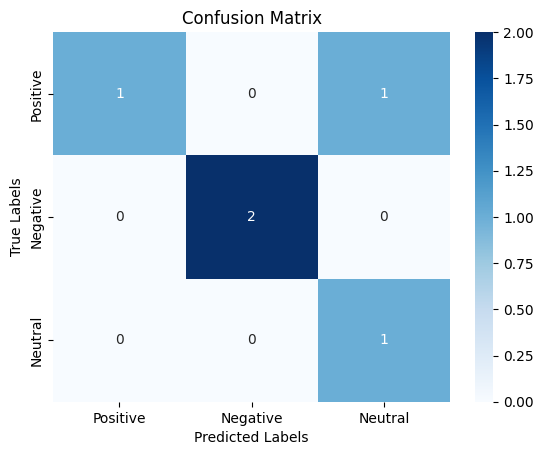

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data: True labels and predicted labels
true_labels = ['positive', 'negative', 'positive', 'neutral', 'negative']
predicted_labels = ['positive', 'negative', 'neutral', 'neutral', 'negative']

cm = confusion_matrix(true_labels, predicted_labels, labels=['positive', 'negative', 'neutral'])

# Heatmap of confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Sentiment distribution (positive, negative, neutral) for each product or category

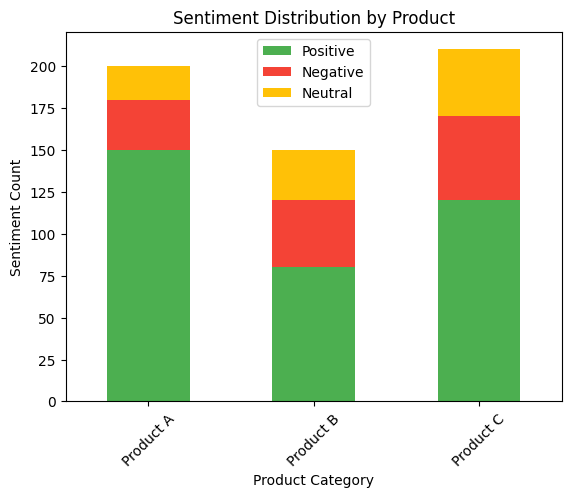

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data: Categories and their sentiment counts
data = {'Category': ['Product A', 'Product B', 'Product C'],
        'Positive': [150, 80, 120],
        'Negative': [30, 40, 50],
        'Neutral': [20, 30, 40]}

df = pd.DataFrame(data)

# Plotting stacked bar graph
df.set_index('Category').plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336', '#FFC107'])
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product Category')
plt.ylabel('Sentiment Count')
plt.xticks(rotation=45)
plt.show()


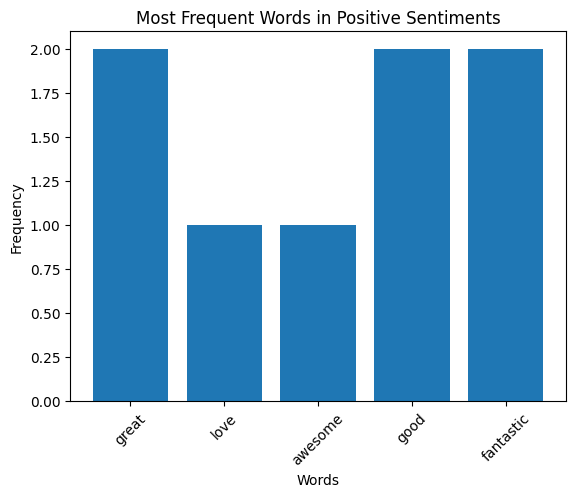

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Example word frequencies for positive sentiment
positive_words = ['great', 'love', 'awesome', 'good', 'fantastic', 'great', 'good', 'fantastic']
word_counts = Counter(positive_words)

# Plotting bar chart for word frequencies
words, counts = zip(*word_counts.items())
plt.bar(words, counts)
plt.title('Most Frequent Words in Positive Sentiments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
